In [ ]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')


plt.style.use("fivethirtyeight")
%matplotlib inline

In [ ]:
df=pd.read_csv('/content/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
df.shape

(150, 6)

In [ ]:
df.drop('Id',axis=1,inplace=True)

In [ ]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
#count the value
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [ ]:
#finding the null value
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

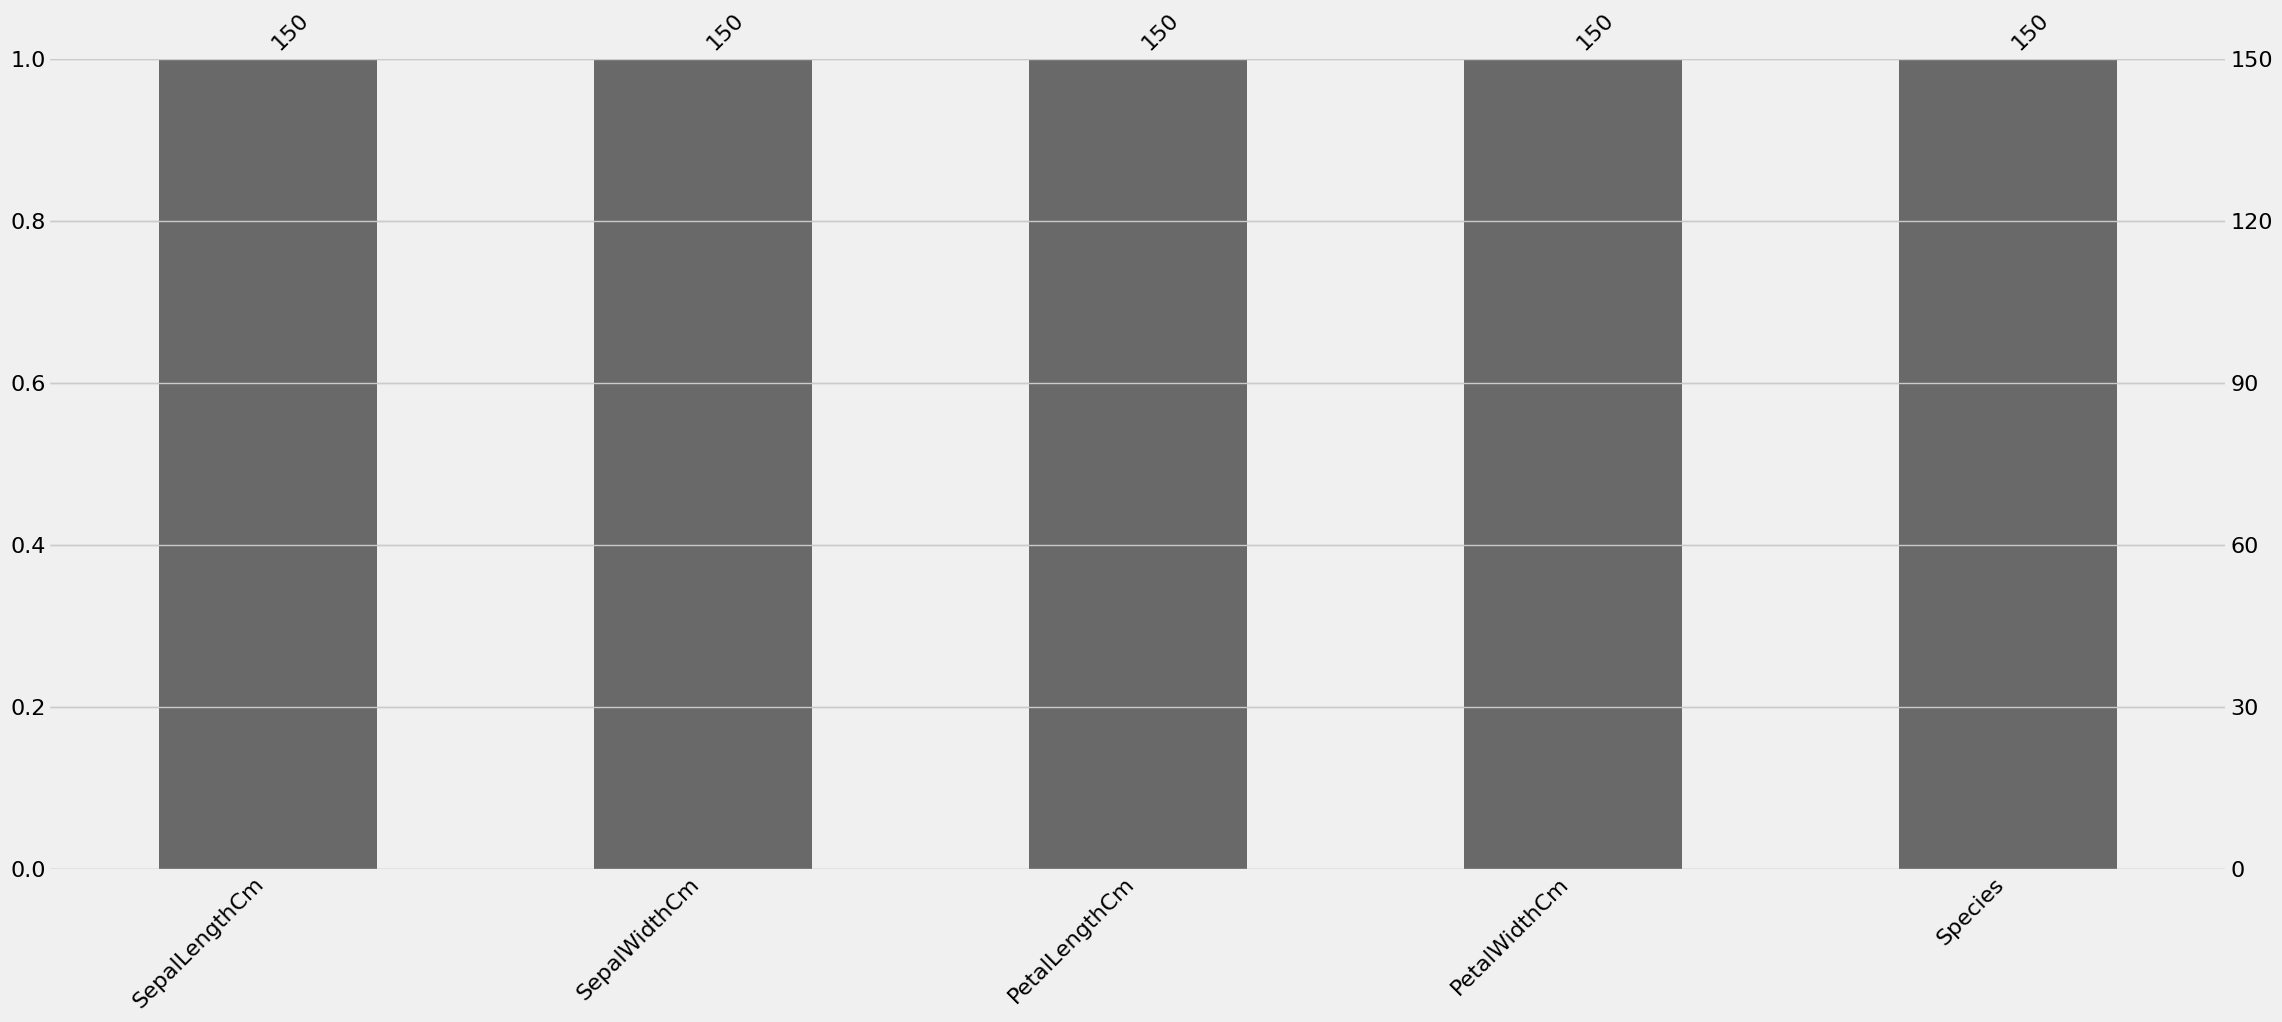

In [ ]:
import missingno as msno
msno.bar(df)
df.drop_duplicates(inplace=True)

<Axes: xlabel='Species', ylabel='SepalLengthCm'>

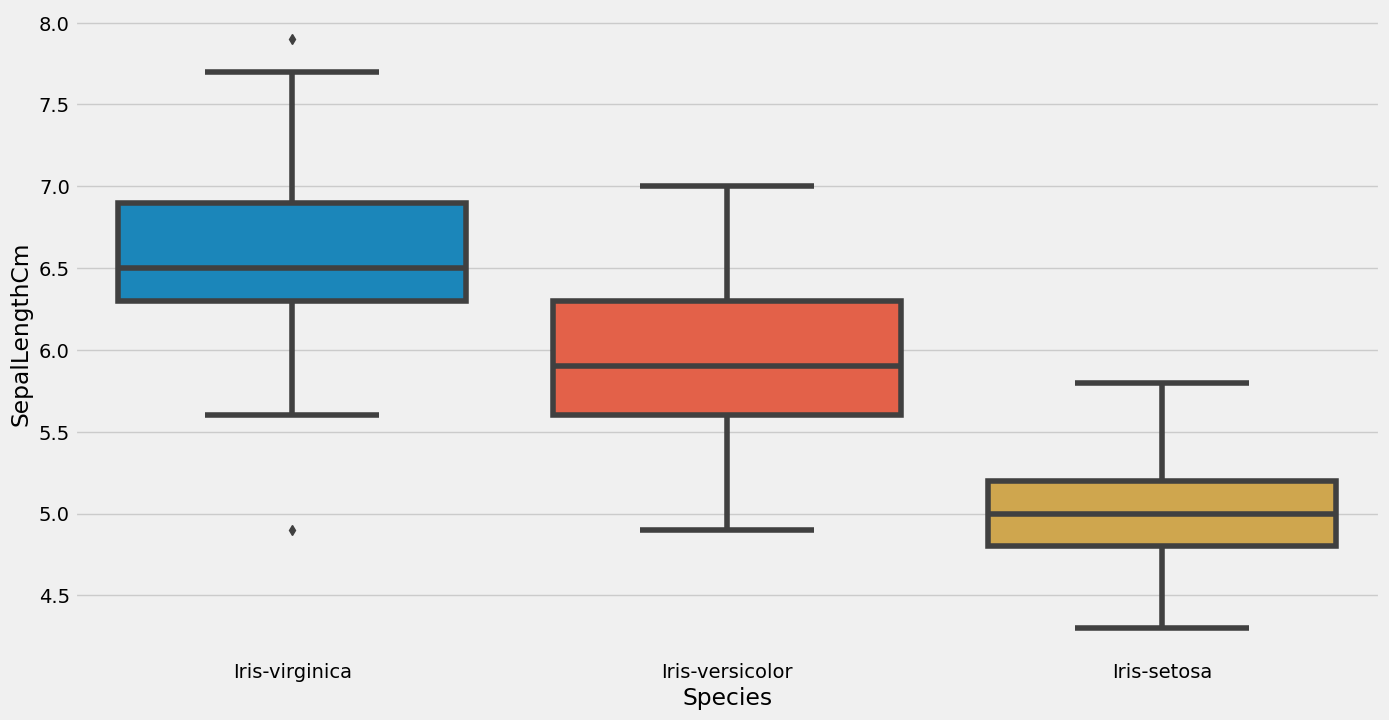

In [ ]:
#Relationship between species and sepal length
plt.figure(figsize=(15,8))
sns.boxplot(x='Species',y='SepalLengthCm',data=df.sort_values('SepalLengthCm',ascending=False))

<Axes: xlabel='SepalWidthCm', ylabel='SepalLengthCm'>

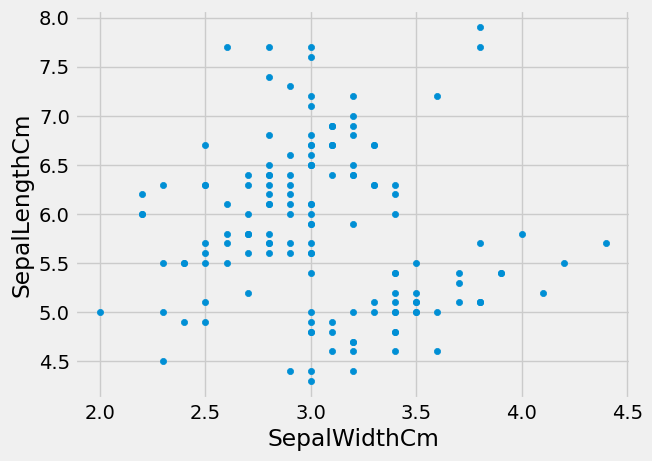

In [ ]:
#Relationship between species and sepal width
df.plot(kind='scatter',x='SepalWidthCm',y='SepalLengthCm')

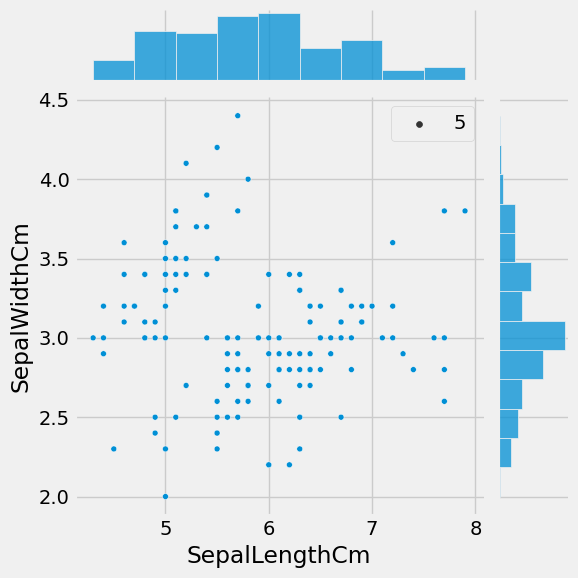

In [ ]:
#Relationship between sepal width and sepal length
sns.jointplot(x="SepalLengthCm", y="SepalWidthCm", data=df, size=5)#

array([[<Axes: title={'center': 'PetalLengthCm'}, xlabel='[Species]'>,
        <Axes: title={'center': 'PetalWidthCm'}, xlabel='[Species]'>],
       [<Axes: title={'center': 'SepalLengthCm'}, xlabel='[Species]'>,
        <Axes: title={'center': 'SepalWidthCm'}, xlabel='[Species]'>]],
      dtype=object)

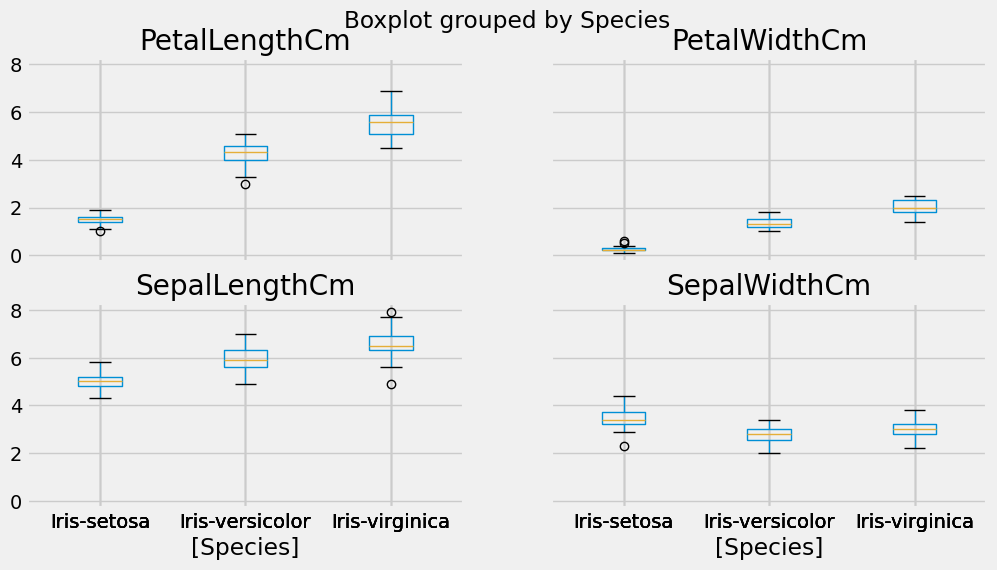

In [ ]:
#Boxplot
df.boxplot(by="Species", figsize=(12, 6))

<Axes: xlabel='Species', ylabel='SepalWidthCm'>

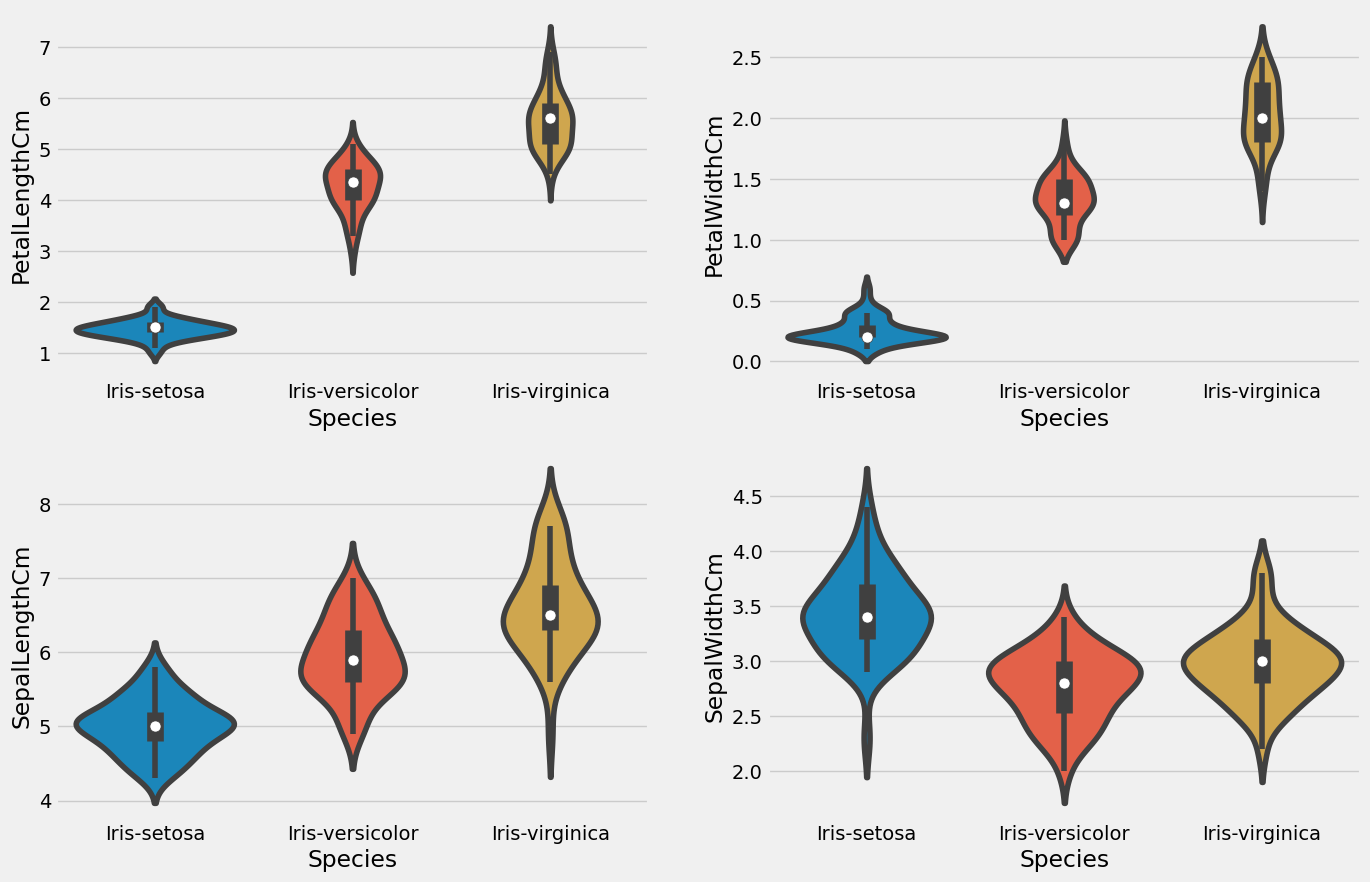

In [ ]:
#Violinplot
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='PetalLengthCm',data=df)
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='PetalWidthCm',data=df)
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='SepalLengthCm',data=df)
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='SepalWidthCm',data=df)

In [ ]:
X=df.drop('Species',axis=1)
y=df['Species']


from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

In [ ]:
df['Species'] = pd.Categorical(df.Species)
df['Species'] = df.Species.cat.codes
# Turn response variable to_categorical(df.response)
y = to_categorical(df.Species)


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,stratify=y,random_state=120)

In [ ]:
model=Sequential()
model.add(Dense(100,activation='relu',input_shape=(4,)))

model.add(Dense(3,activation='softmax'))

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
h=model.fit(X_train,y_train,epochs=45,validation_data=(X_test, y_test))

Epoch 1/45
4/4 [==============================] - 1s 92ms/step - loss: 1.2062 - accuracy: 0.3333 - val_loss: 1.1090 - val_accuracy: 0.3333
Epoch 2/45
4/4 [==============================] - 0s 13ms/step - loss: 1.0908 - accuracy: 0.3333 - val_loss: 1.0485 - val_accuracy: 0.3333
Epoch 3/45
4/4 [==============================] - 0s 16ms/step - loss: 1.0330 - accuracy: 0.3824 - val_loss: 1.0123 - val_accuracy: 0.6444
Epoch 4/45
4/4 [==============================] - 0s 16ms/step - loss: 0.9998 - accuracy: 0.6569 - val_loss: 0.9744 - val_accuracy: 0.6667
Epoch 5/45
4/4 [==============================] - 0s 20ms/step - loss: 0.9569 - accuracy: 0.6667 - val_loss: 0.9231 - val_accuracy: 0.6667
Epoch 6/45
4/4 [==============================] - 0s 22ms/step - loss: 0.9033 - accuracy: 0.6765 - val_loss: 0.8764 - val_accuracy: 0.7333
Epoch 7/45
4/4 [==============================] - 0s 19ms/step - loss: 0.8635 - accuracy: 0.6765 - val_loss: 0.8412 - val_accuracy: 0.6667
Epoch 8/45
4/4 [===========

In [ ]:
model.evaluate(X_test,y_test)

2/2 [==============================] - 0s 12ms/step - loss: 0.3981 - accuracy: 0.8889


[0.3981385827064514, 0.8888888955116272]

In [ ]:
prediction = model.predict(X_test[:10])
print(prediction)

1/1 [==============================] - 0s 463ms/step
[[0.00717431 0.35122734 0.64159834]
 [0.96977264 0.02576202 0.00446539]
 [0.05602393 0.4995807  0.4443953 ]
 [0.9052266  0.07837126 0.01640212]
 [0.8828834  0.09377897 0.02333771]
 [0.01555256 0.36659378 0.6178537 ]
 [0.9162272  0.06723128 0.01654158]
 [0.00719109 0.37085342 0.62195545]
 [0.18455718 0.48870313 0.32673964]
 [0.00994472 0.33372584 0.6563294 ]]


In [ ]:
h.history['accuracy']
h.history['val_accuracy']

[0.3333333432674408,
 0.3333333432674408,
 0.644444465637207,
 0.6666666865348816,
 0.6666666865348816,
 0.7333333492279053,
 0.6666666865348816,
 0.6666666865348816,
 0.6666666865348816,
 0.6666666865348816,
 0.6666666865348816,
 0.9111111164093018,
 0.8888888955116272,
 0.8666666746139526,
 0.7333333492279053,
 0.7333333492279053,
 0.7333333492279053,
 0.8222222328186035,
 0.8444444537162781,
 0.9777777791023254,
 0.9555555582046509,
 0.9333333373069763,
 0.7333333492279053,
 0.800000011920929,
 0.9777777791023254,
 0.9777777791023254,
 0.9333333373069763,
 0.8888888955116272,
 0.9777777791023254,
 0.9777777791023254,
 0.9111111164093018,
 0.9333333373069763,
 0.9555555582046509,
 0.8888888955116272,
 0.9777777791023254,
 0.8888888955116272,
 0.8888888955116272,
 0.9333333373069763,
 0.9555555582046509,
 0.9777777791023254,
 0.9777777791023254,
 0.8888888955116272,
 0.8444444537162781,
 0.8444444537162781,
 0.8888888955116272]

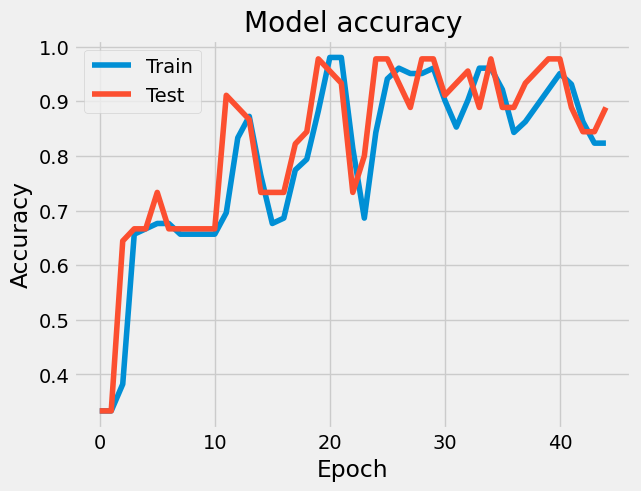

In [ ]:
plt.figure()
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()